<a href="https://colab.research.google.com/github/CristaldoWeint/M72_03_Gesti-n-y-procesamiento-de-base-de-datos-y-nociones-de-auditor-a-no-presencial/blob/main/u3_clase_6_3_python_sql.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

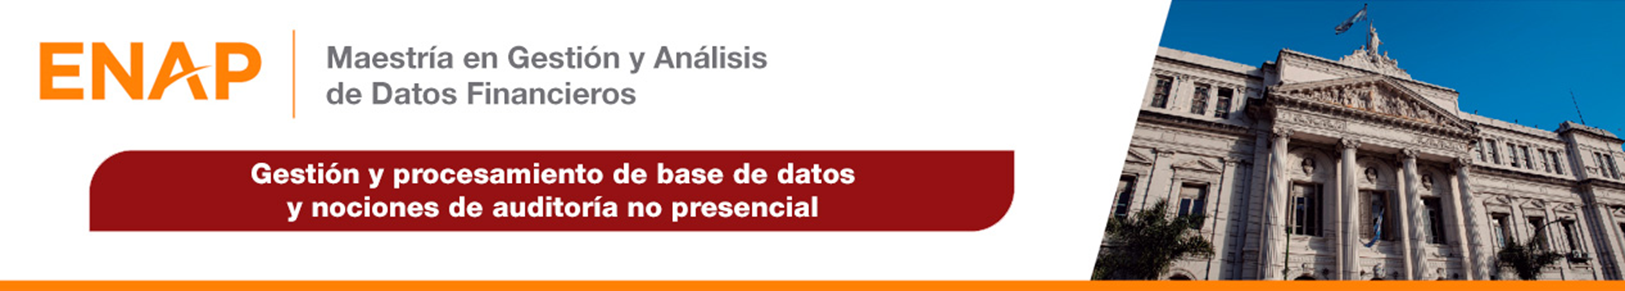

M71V MAESTRÍA EN GESTIÓN Y ANÁLISIS DE DATOS FINANCIEROS
# Gestión y procesamiento de base de datos y nociones de auditoría no presencial

**Clase 6.3: Python-SQLite**

Natalia Salaberry

En esta clase veremos como almacenar un DataFrame en una base de datos SQL y luego crear las tablas individuales.

**Con las tablas creadas las puede exportarlas y luego importarlas en MySQL Workbench**


*NOTA: al estar en un entorno online no es posible conectarse direcatamente con MySQL Benchmark que posee en su PC.*

# **1) Obtención de datos que luego serán transformados en DataFrame para ser almacenados en una base SQL**

Se trabajará con el dataframe bank_transactions

En primer lugar importar el archivo csv al entorno (o si desea lo almacena en su Drive y luego se conecta al mismo y hace la lectura)

In [ ]:
#se convierte a DataFrame y se resetea el índice para convertirlo en columna de dato
import pandas as pd
DATA=pd.read_csv("/content/bank_transactions.csv", sep=";", encoding="latin1")
DATA

,ID_Cuenta_Cliente,ID_Tipo_cuenta,Tipo_cuenta,Saldo_cuenta,ID_Trx,ID_Tipo_Trx,Tipo_Trx,Fecha_Trx,Monto_Trx,ID_Cliente,Nombre_Cliente,Fecha_Nac_Cliente,Género_Cliente,Localidad_Cliente,Provincia_Cliente,ID_Sucursal,Nombre_Sucursal
0,31.0,3.0,Sueldo,125000.0,1.0,1.0,Transferencia,2/8/2016,$ 17.820,1.0,abcd,10/1/1994,Femenino,Rosario,Santa Fé,2.0,ROS
1,31.0,3.0,Sueldo,125000.0,2.0,3.0,Tarjeta de crédito,1/8/2016,$ 19.519,1.0,abcd,10/1/1994,Femenino,Rosario,Santa Fé,2.0,ROS
2,31.0,3.0,Sueldo,125000.0,3.0,2.0,Tarjeta de débito,3/8/2016,$ 21.200,1.0,abcd,10/1/1994,Femenino,Rosario,Santa Fé,2.0,ROS
3,22.0,2.0,Corriente,300000.0,4.0,4.0,Cheque,5/8/2016,$ 50.000,2.0,efg,4/4/1957,Masculino,CABA,CABA,1.0,CABA
4,22.0,2.0,Corriente,300000.0,5.0,4.0,Cheque,5/8/2016,$ 30.000,2.0,efg,4/4/1957,Masculino,CABA,CABA,1.0,CABA
5,13.0,1.0,Caja de ahorro,230000.0,6.0,3.0,Tarjeta de crédito,4/8/2016,$ 36.500,3.0,hij,14/9/1973,Femenino,Ciudad de Córdoba,Córdoba,3.0,CBA
6,13.0,1.0,Caja de ahorro,230000.0,7.0,2.0,Tarjeta de débito,4/8/2016,$ 17.900,3.0,hij,14/9/1973,Femenino,Ciudad de Córdoba,Córdoba,3.0,CBA
7,34.0,3.0,Sueldo,125000.0,8.0,1.0,Transferencia,2/8/2016,$ 97.000,4.0,klm,24/3/1988,Femenino,Rosario,Santa Fé,2.0,ROS
8,34.0,3.0,Sueldo,125000.0,9.0,3.0,Tarjeta de crédito,1/8/2016,$ 53.609,4.0,klm,24/3/1988,Femenino,Rosario,Santa Fé,2.0,ROS
9,34.0,3.0,Sueldo,125000.0,10.0,2.0,Tarjeta de débito,3/8/2016,$ 24.300,4.0,klm,24/3/1988,Femenino,Rosario,Santa Fé,2.0,ROS


In [ ]:
DATA.shape

(15, 17)

In [ ]:
DATA.columns

Index(['ID_Cuenta_Cliente', 'ID_Tipo_cuenta', 'Tipo_cuenta', 'Saldo_cuenta',
       'ID_Trx', 'ID_Tipo_Trx', 'Tipo_Trx', 'Fecha_Trx', 'Monto_Trx',
       'ID_Cliente', 'Nombre_Cliente', 'Fecha_Nac_Cliente', 'Género_Cliente',
       'Localidad_Cliente', 'Provincia_Cliente', 'ID_Sucursal',
       'Nombre_Sucursal'],
      dtype='object')

# **2) Creación de base de datos SQL**

In [ ]:
import sqlite3 as sql

#se crea a una base sql dandole un nombre (La misma se observa en el menú de la izquierda. Podría optar por crearla en su Drive)
conexión = sql.connect("bank.db")

#si se quiere cerrar la conexión
#conexión.close()
#para luego generar la conexión nuevamente conexión = sql.connect("bank.db")

In [ ]:
import pandas.io.sql as pd_sql

#se almacena el DataFrame como tabla en la base creada
pd_sql.to_sql(DATA,'DATA',conexión, index=False)
#donde DATA es el el DataFrame, 'DATA' es el nombre de la tabla creada en la base,
# conexión es la conexión a la base, index=False para no almacenar el índice de Python

15

# **3) Lectura de la tabla almacenada en la base**

In [ ]:
#ejecución de querie (lectura de la tabla)
rs=conexión.execute('select * from DATA')

In [ ]:
# conversión a Data Frame del resultado del query

data_sql=pd.DataFrame(data=rs, columns=['ID_Cuenta_Cliente', 'ID_Tipo_cuenta', 'Tipo_cuenta', 'Saldo_cuenta',
       'ID_Trx', 'ID_Tipo_Trx', 'Tipo_Trx', 'Fecha_Trx', 'Monto_Trx',
       'ID_Cliente', 'Nombre_Cliente', 'Fecha_Nac_Cliente', 'Genero_Cliente',
       'Localidad_Cliente', 'Provincia_Cliente', 'ID_Sucursal',
       'Nombre_Sucursal'])

In [ ]:
#se observa
data_sql.head(5)

,ID_Cuenta_Cliente,ID_Tipo_cuenta,Tipo_cuenta,Saldo_cuenta,ID_Trx,ID_Tipo_Trx,Tipo_Trx,Fecha_Trx,Monto_Trx,ID_Cliente,Nombre_Cliente,Fecha_Nac_Cliente,Genero_Cliente,Localidad_Cliente,Provincia_Cliente,ID_Sucursal,Nombre_Sucursal
0,31.0,3.0,Sueldo,125000.0,1.0,1.0,Transferencia,2/8/2016,$ 17.820,1.0,abcd,10/1/1994,Femenino,Rosario,Santa Fé,2.0,ROS
1,31.0,3.0,Sueldo,125000.0,2.0,3.0,Tarjeta de crédito,1/8/2016,$ 19.519,1.0,abcd,10/1/1994,Femenino,Rosario,Santa Fé,2.0,ROS
2,31.0,3.0,Sueldo,125000.0,3.0,2.0,Tarjeta de débito,3/8/2016,$ 21.200,1.0,abcd,10/1/1994,Femenino,Rosario,Santa Fé,2.0,ROS
3,22.0,2.0,Corriente,300000.0,4.0,4.0,Cheque,5/8/2016,$ 50.000,2.0,efg,4/4/1957,Masculino,CABA,CABA,1.0,CABA
4,22.0,2.0,Corriente,300000.0,5.0,4.0,Cheque,5/8/2016,$ 30.000,2.0,efg,4/4/1957,Masculino,CABA,CABA,1.0,CABA


Ya se cuenta con un DataFrame leído desde una base SQL para continuar trabajando en Python

# **4) Creación de las tablas en la base.**


Por ejemplo: se crea la tabla genero

In [ ]:
print(DATA.columns)

Index(['ID_Cuenta_Cliente', 'ID_Tipo_cuenta', 'Tipo_cuenta', 'Saldo_cuenta',
       'ID_Trx', 'ID_Tipo_Trx', 'Tipo_Trx', 'Fecha_Trx', 'Monto_Trx',
       'ID_Cliente', 'Nombre_Cliente', 'Fecha_Nac_Cliente', 'Género_Cliente',
       'Localidad_Cliente', 'Provincia_Cliente', 'ID_Sucursal',
       'Nombre_Sucursal'],
      dtype='object')


In [ ]:
#se genera la consulta
bank_genero = conexión.execute("SELECT distinct Género_Cliente from DATA")

In [ ]:
#se convierte a Dataframe
genero=pd.DataFrame(data=bank_genero, columns=['DESCRIPCION'])
genero

,DESCRIPCION
0,Femenino
1,Masculino
2,None


In [ ]:
#se agrega una columna al DataFrame
genero['ID_GENERO'] = range(1, len(genero) + 1)

In [ ]:
#se observa
genero

,DESCRIPCION,ID_GENERO
0,Femenino,1
1,Masculino,2
2,None,3


In [ ]:
#Se crea la tabla en la base
pd_sql.to_sql(genero,'GENERO',conexión, index=False)

3

In [ ]:
#verificamos
ge=conexión.execute('select * from GENERO')

pd.DataFrame(data=ge, columns=[ 'DESCRIPCION', 'ID_GENERO'])

,DESCRIPCION,ID_GENERO
0,Femenino,1
1,Masculino,2
2,None,3


Así puede continuar creando las tablas en la base.

Una vez que tenga todas las tablas creadas en la base, descarga el archivo bank.db

Ese archivo lo importa en MySQL Workbench y se le creará la base completa.


# **OTRO EJEMPLO CON MÁS DE UNA FUENTE DE DATOS**

Suponga que tiene información sobre la empresa en un archivo de datos (MSFT-APPL.csv) y por otro obtiene datos de la cotización en bolsa de la empresa.

Primero importamos el archivo al Colab MSFT-APPL.csv y lo leemos con Pandas

In [ ]:
import pandas as pd

EMPRESAS=pd.read_csv('/content/MSFT-APPL.csv', sep=";")

EMPRESAS

,NAME_COMPANY,SYMBOL_YAHOO_FINANCE,COUNTRY,STATE,CITY,YEAR_FUNDATION,SECTOR
0,Microsoft Corp.,MSFT,US,New Mexico,Albuquerque,1975,Tecnologia
1,Apple Inc.,AAPL,US,California,Los Altos,1976,Tecnologia


## Ahora obtenemos datos de cotización de MSFT y APPL desde la Api de Yahoo, pero agregando una columna con el SYMBOL

In [ ]:
import yfinance as yf

In [ ]:
#se importan los datos a través de la API

#Obtención de datos

Datos = yf.download(['MSFT', 'AAPL'], start='2023-03-20', end='2023-03-24')

#Observación de los datos obtenidos
Datos.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  2 of 2 completed


Price            Close                    High                     Low  \
Ticker            AAPL        MSFT        AAPL        MSFT        AAPL   
Date                                                                     
2023-03-20  155.828506  267.968048  156.244326  273.135855  152.610955   
2023-03-21  157.689743  269.493805  157.808540  270.694706  154.977094   
2023-03-22  156.254211  268.027130  160.521178  276.640143  156.234407   
2023-03-23  157.343216  273.313080  159.937068  276.659845  156.105696   

Price                         Open                Volume            
Ticker            MSFT        AAPL        MSFT      AAPL      MSFT  
Date                                                                
2023-03-20  265.625304  153.521783  272.643683  73641400  43466600  
2023-03-21  265.300488  155.749320  270.576590  73938300  34558700  
2023-03-22  267.918837  157.709536  269.119738  75701800  34873300  
2023-03-23  270.891601  157.244223  273.588695  67622100  36610900

 **Pero esta estructura de datos no son compatibles con la necesidad que se tiene para una base de datos SQL transaccional.
Entonces:**  

In [ ]:
#Obtención de datos, formateo a dataframe con generación de columna symbol

Datos_MSFT = pd.DataFrame(yf.download('MSFT', start='2023-03-20', end='2023-03-24', multi_level_index=False)).reset_index()
Datos_MSFT=Datos_MSFT.assign(SYMBOL_YAHOO_FINANCE='MSFT')
Datos_AAPL = pd.DataFrame(yf.download('AAPL', start='2023-03-20', end='2023-03-24', multi_level_index=False)).reset_index()
Datos_AAPL=Datos_AAPL.assign(SYMBOL_YAHOO_FINANCE='AAPL')

#GENERACIÓN DE UN SOLO DATAFRAME
DATA_YAHOO=pd.concat([Datos_MSFT,Datos_AAPL])
#RESETEO DE INDICE
DATA_YAHOO.reset_index(drop=True, inplace=True)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
DATA_YAHOO

,Date,Close,High,Low,Open,Volume,SYMBOL_YAHOO_FINANCE
0,2023-03-20,267.968048,273.135855,265.625304,272.643683,43466600,MSFT
1,2023-03-21,269.493805,270.694706,265.300488,270.576590,34558700,MSFT
2,2023-03-22,268.027130,276.640143,267.918837,269.119738,34873300,MSFT
3,2023-03-23,273.313080,276.659845,270.891601,273.588695,36610900,MSFT
4,2023-03-20,155.828506,156.244326,152.610955,153.521783,73641400,AAPL
5,2023-03-21,157.689743,157.808540,154.977094,155.749320,73938300,AAPL
6,2023-03-22,156.254211,160.521178,156.234407,157.709536,75701800,AAPL
7,2023-03-23,157.343216,159.937068,156.105696,157.244223,67622100,AAPL


Ahora si tiene una estructura de tabla transaccional y con la columna de SYMBOL puede unir la información que contiene en EMPRESAS. Entonces:

In [ ]:
#RENOMBRAR COLUMNAS IGUAL QUE TABLA EN BASE DE DATOS SQL
DATA_YAHOO.rename(columns={'Date': 'FECHA','Close': 'COT_CLOSE', 'High': 'COT_HIG', 'Low': 'COT_LOW','Open': 'COT_OPEN','Volume': 'VOLUME'}, inplace=True)
DATA_YAHOO

,FECHA,COT_CLOSE,COT_HIG,COT_LOW,COT_OPEN,VOLUME,SYMBOL_YAHOO_FINANCE
0,2023-03-20,267.968048,273.135855,265.625304,272.643683,43466600,MSFT
1,2023-03-21,269.493805,270.694706,265.300488,270.576590,34558700,MSFT
2,2023-03-22,268.027130,276.640143,267.918837,269.119738,34873300,MSFT
3,2023-03-23,273.313080,276.659845,270.891601,273.588695,36610900,MSFT
4,2023-03-20,155.828506,156.244326,152.610955,153.521783,73641400,AAPL
5,2023-03-21,157.689743,157.808540,154.977094,155.749320,73938300,AAPL
6,2023-03-22,156.254211,160.521178,156.234407,157.709536,75701800,AAPL
7,2023-03-23,157.343216,159.937068,156.105696,157.244223,67622100,AAPL


In [ ]:
data_final=pd.merge(DATA_YAHOO, EMPRESAS, on="SYMBOL_YAHOO_FINANCE")
data_final

,FECHA,COT_CLOSE,COT_HIG,COT_LOW,COT_OPEN,VOLUME,SYMBOL_YAHOO_FINANCE,NAME_COMPANY,COUNTRY,STATE,CITY,YEAR_FUNDATION,SECTOR
0,2023-03-20,267.968048,273.135855,265.625304,272.643683,43466600,MSFT,Microsoft Corp.,US,New Mexico,Albuquerque,1975,Tecnologia
1,2023-03-21,269.493805,270.694706,265.300488,270.576590,34558700,MSFT,Microsoft Corp.,US,New Mexico,Albuquerque,1975,Tecnologia
2,2023-03-22,268.027130,276.640143,267.918837,269.119738,34873300,MSFT,Microsoft Corp.,US,New Mexico,Albuquerque,1975,Tecnologia
3,2023-03-23,273.313080,276.659845,270.891601,273.588695,36610900,MSFT,Microsoft Corp.,US,New Mexico,Albuquerque,1975,Tecnologia
4,2023-03-20,155.828506,156.244326,152.610955,153.521783,73641400,AAPL,Apple Inc.,US,California,Los Altos,1976,Tecnologia
5,2023-03-21,157.689743,157.808540,154.977094,155.749320,73938300,AAPL,Apple Inc.,US,California,Los Altos,1976,Tecnologia
6,2023-03-22,156.254211,160.521178,156.234407,157.709536,75701800,AAPL,Apple Inc.,US,California,Los Altos,1976,Tecnologia
7,2023-03-23,157.343216,159.937068,156.105696,157.244223,67622100,AAPL,Apple Inc.,US,California,Los Altos,1976,Tecnologia


In [ ]:
#se exporta en formato csv para luego descargarlo e importarlo en Workbench

data_final.to_csv('/content/data_final.csv', sep=";", index=False)

Una vez que importe data_final.csvc en workbench, creara uan tabla. Sobre esta con SQL puede realizar queries que devuelvan los datos que deberá insertar en cada tabla correspondiente y previamente creada en una base de datos. Cuando finalice con esta etapa de insercción de dtaos, debe borrar la tabla que contiene lo que es el DataFrame y solo quedarse con las tablas correspondientes a una base de datos estructurada.